# Classification

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# Get dataset
data = pd.read_csv('data/preprocessed_dataset.csv')

'''For test_sample dataset comment out the line above and uncomment the line below'''
# data = pd.read_csv('data/test_sample.csv')

In [3]:
data.head()

,FRUTDA1_,HTIN4,PDIABTST,PAFREQ2_,LASTSMK2,TRNSGNDR,PREDIAB1,HAVARTH3,ACTIN11_,BLOODCHO,...,INTERNET,SEX,CVDSTRK3,GENHLTH,DIFFWALK,_AGEG5YR,BPHIGH4,EMPLOY1,CVDCRHD4,CVDINFR4
0,33.0,70.0,1.0,NaN,2.0,NaN,3.0,1.0,NaN,1.0,...,2.0,2.0,2.0,5.0,1.0,9.0,1.0,8.0,2.0,0
1,17.0,68.0,2.0,2800.0,NaN,NaN,3.0,2.0,1.0,1.0,...,1.0,2.0,2.0,3.0,2.0,7.0,3.0,3.0,2.0,0
2,100.0,67.0,2.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,...,2.0,2.0,2.0,5.0,1.0,9.0,1.0,8.0,2.0,0
3,200.0,64.0,1.0,NaN,NaN,NaN,3.0,1.0,NaN,1.0,...,1.0,2.0,2.0,5.0,2.0,9.0,3.0,8.0,2.0,0
4,100.0,62.0,1.0,7000.0,NaN,NaN,3.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,11.0,1.0,2.0,2.0,0


## XGBoost

In [4]:
# Get labels
labels = data['CVDINFR4']

# Remove labels from dataset
data.drop(['CVDINFR4'], axis=1, inplace=True)

In [5]:
# Normalize dataset
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

In [6]:
# Divide data in training and testing
X_train, X_test, y_train, y_test = train_test_split(data_norm, labels, shuffle=True, test_size=0.2, random_state=42)

In [7]:
# Model training 
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[06:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=24, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [8]:
# Prediction
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     82801
           1       0.60      0.30      0.40      5045

    accuracy                           0.95     87846
   macro avg       0.78      0.64      0.69     87846
weighted avg       0.94      0.95      0.94     87846



Accuracy on test data: 0.95
Accuracy on training data: 0.95


C:\Users\lilo2\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


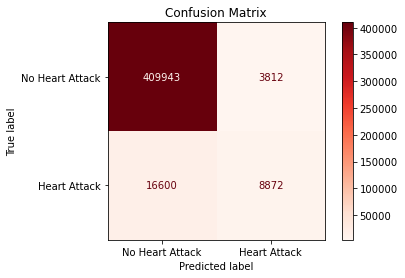

In [9]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
matrix = plot_confusion_matrix(model, data_norm, labels, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [10]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'n_estimators':[150, 200, 250, 300], 'max_depth':[5, 6, 7, 8], 'learning_rate':[0.01, 0.02, 0.03]}

In [11]:
# Model training - Adjust Hyperparameters
model = XGBClassifier(use_label_encoder=False, scale_pos_weight=33)
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

[06:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[06:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:17:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:17:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[06:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:30:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:44:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=33, subsample=None,
                                     tree_method=None, use_label_encoder=Fa

In [12]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=24, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=33, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [13]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79     82801
           1       0.14      0.91      0.24      5045

    accuracy                           0.66     87846
   macro avg       0.56      0.78      0.51     87846
weighted avg       0.94      0.66      0.75     87846



Accuracy on test data: 0.91
Accuracy on training data: 0.92


C:\Users\lilo2\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


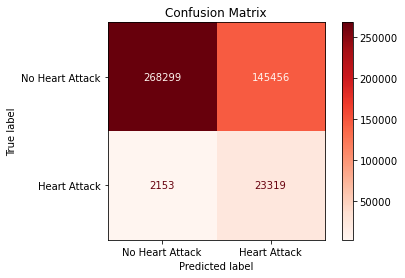

In [14]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, data_norm, labels, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

## Decision Tree

In [15]:
# As established before, not setting class balance hyperparameter gives poor recall scores, therefore setting class as balanced
# while hyperparameter tunning can be followed for other models too. 

In [16]:
# Filling NaN values with zero because the following tree algorithms can't work with Nan values
df = data.copy()
df = df.fillna(0)

In [17]:
# Normalize dataset
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [18]:
# Divide data in training and testing
X_train, X_test, y_train, y_test = train_test_split(df_norm, labels, shuffle=True, test_size=0.2, random_state=42)

In [19]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'splitter':['best', 'random'], 'max_depth':[5, 10, 15, 20, 25], 'criterion':['gini', 'entropy']}

In [20]:
# Model training - Adjust Hyperparameters
model = tree.DecisionTreeClassifier(class_weight="balanced")
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [21]:
clf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [22]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     82801
           1       0.16      0.83      0.26      5045

    accuracy                           0.73     87846
   macro avg       0.57      0.78      0.55     87846
weighted avg       0.94      0.73      0.80     87846



Accuracy on test data: 0.83
Accuracy on training data: 0.83


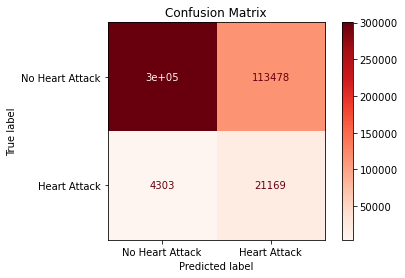

In [23]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, df_norm, labels, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

## Random Forest

In [24]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'bootstrap':[True, False], 'max_depth':[5, 10, 15, 20], 'n_estimators':[100, 150, 200]}

In [25]:
# Model training - Adjust Hyperparameters
model = RandomForestClassifier(class_weight="balanced")
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 150, 200]},
             scoring='recall')

In [26]:
clf.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=5,
                       n_estimators=200)

In [27]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.87     82801
           1       0.19      0.82      0.31      5045

    accuracy                           0.79     87846
   macro avg       0.59      0.80      0.59     87846
weighted avg       0.94      0.79      0.84     87846



Accuracy on test data: 0.82
Accuracy on training data: 0.82


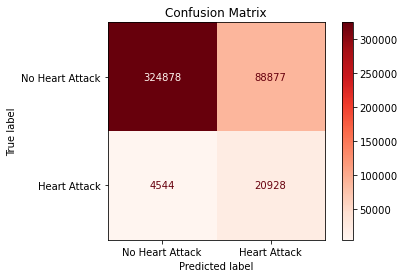

In [28]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, df_norm, labels, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

## Logistic Regression

In [29]:
# Parameters for hyperparameter tuning using GridSearchCV - Check what parameters give the best results
parameters = {'max_iter':[100, 150, 200]}

In [30]:
# Model training - Adjust Hyperparameters
model = LogisticRegression(class_weight="balanced")
clf = GridSearchCV(model, parameters, scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'max_iter': [100, 150, 200]}, scoring='recall')

In [31]:
clf.best_estimator_

LogisticRegression(class_weight='balanced')

In [32]:
# Prediction
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85     82801
           1       0.16      0.79      0.26      5045

    accuracy                           0.75     87846
   macro avg       0.57      0.77      0.55     87846
weighted avg       0.94      0.75      0.81     87846



Accuracy on test data: 0.79
Accuracy on training data: 0.79


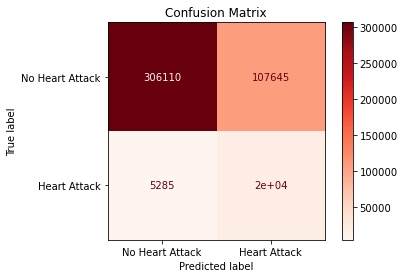

In [33]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(clf.score(X_train, y_train)))
matrix = plot_confusion_matrix(clf, df_norm, labels, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

## Gaussian Naive Bayes 

In [34]:
# This algorithm does not have a hyperparameter for class balancing, so these results are skewed.

In [35]:
# Model training 
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [36]:
# Prediction
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     82801
           1       0.20      0.61      0.30      5045

    accuracy                           0.84     87846
   macro avg       0.59      0.73      0.61     87846
weighted avg       0.93      0.84      0.87     87846



Accuracy on test data: 0.84
Accuracy on training data: 0.84


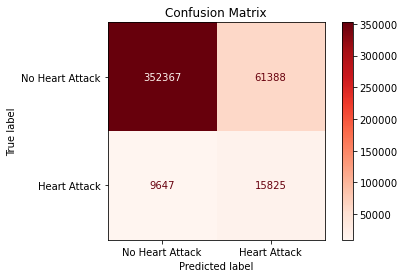

In [37]:
# Confusion matrix 
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
matrix = plot_confusion_matrix(model, df_norm, labels, display_labels=['No Heart Attack',"Heart Attack"], cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [ ]:
# Conclusion: XGBoost gave the best recall score, but the worst accuracy. In this case we are giving more importance to 
# recall since we care more about positive cases (susceptible to having a Heart Attack) being predicted correctly.